**I. Инициализация**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
policies = pd.read_csv("Risk.csv")

**II. Исследование данных**

In [ ]:
policies.head()

,Gender,State,State_Rate,Height,Weight,BMI,Age,Risk
0,Male,MA,0.100434,184,67.8,20.025992,77,High
1,Male,VA,0.141723,163,89.4,33.648237,82,High
2,Male,NY,0.090803,170,81.2,28.096886,31,Low
3,Male,TN,0.119973,175,99.7,32.555102,39,Low
4,Male,FL,0.110345,184,72.1,21.296078,68,High


In [ ]:
policies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1942 entries, 0 to 1941
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1942 non-null   object 
 1   State       1942 non-null   object 
 2   State_Rate  1942 non-null   float64
 3   Height      1942 non-null   int64  
 4   Weight      1942 non-null   float64
 5   BMI         1942 non-null   float64
 6   Age         1942 non-null   int64  
 7   Risk        1942 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 121.5+ KB


In [ ]:
policies.describe(include = "all")

,Gender,State,State_Rate,Height,Weight,BMI,Age,Risk
count,1942,1942,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942
unique,2,51,NaN,NaN,NaN,NaN,NaN,2
top,Male,CA,NaN,NaN,NaN,NaN,NaN,Low
freq,986,191,NaN,NaN,NaN,NaN,NaN,1366
mean,NaN,NaN,0.138064,169.718847,81.155767,28.292804,50.841401,NaN
std,NaN,NaN,0.044180,9.571082,16.009041,5.808799,19.327130,NaN
min,NaN,NaN,0.001000,150.000000,44.100000,16.022174,18.000000,NaN
25%,NaN,NaN,0.110345,162.000000,68.600000,23.739705,34.000000,NaN
50%,NaN,NaN,0.127584,170.000000,81.300000,28.055706,51.000000,NaN
75%,NaN,NaN,0.144251,176.000000,93.800000,32.456822,68.000000,NaN


In [ ]:
policies.isnull().sum()

,0
Gender,0
State,0
State_Rate,0
Height,0
Weight,0
BMI,0
Age,0
Risk,0


**III. Преобразование данных**

In [ ]:
X = policies[["Gender", "State_Rate", "Height", "Weight", "BMI", "Age"]]

In [ ]:
X.Gender.replace(("Female", "Male"), (0, 1), inplace = True)

In [ ]:
X.head()

,Gender,State_Rate,Height,Weight,BMI,Age
0,1,0.100434,184,67.8,20.025992,77
1,1,0.141723,163,89.4,33.648237,82
2,1,0.090803,170,81.2,28.096886,31
3,1,0.119973,175,99.7,32.555102,39
4,1,0.110345,184,72.1,21.296078,68


In [ ]:
y = policies.Risk

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

**IV. Разделение набора на обучающие и тестовые данные**

In [ ]:
np.random.seed(42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y,
    train_size = 0.80,
    test_size = 0.20)

**V. Create KNN Classifier Models**

In [ ]:
knn_model = KNeighborsClassifier()

Определим гиперпараметры KNN (т.е. k = {2, 7, 9, 11, 13})

In [ ]:
knn_params = [5, 7, 9, 11, 13]
knn_param_grid = {"n_neighbors" : knn_params}

Создать 10 моделей KNN для каждого из пяти гиперпараметров, используя 10-кратную перекрестную проверку.

In [ ]:
knn_models = GridSearchCV(
    estimator = knn_model,
    param_grid = knn_param_grid,
    scoring = "accuracy",
    cv = 10,
    verbose = 1)

In [ ]:
knn_models.fit(X = X_train, y = y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 7, 9, 11, 13]}, scoring='accuracy',
             verbose=1)

In [ ]:
knn_avg_scores = knn_models.cv_results_["mean_test_score"]

Отображение средней точности для каждого гиперпараметра

In [ ]:
for i in range(0, 5):
    print("{:>3} : {:0.3f}"
        .format(knn_params[i], knn_avg_scores[i]))

  5 : 0.965
  7 : 0.967
  9 : 0.968
 11 : 0.965
 13 : 0.968


Построим график изменения точности по каждому гиперпараметру.

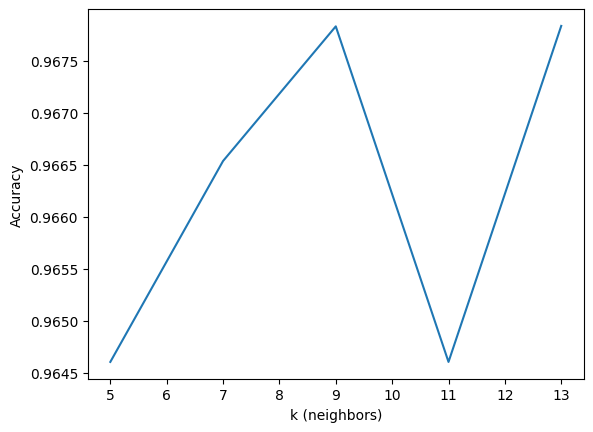

In [ ]:
plt.plot(
    knn_params,
    knn_avg_scores)
plt.xlabel("k (neighbors)")
plt.ylabel("Accuracy")
plt.show()

Вычислим гиперпараметр, среднюю точность и стандартную ошибку самой эффективной модели.

In [ ]:
knn_top_index = np.argmax(knn_avg_scores)
knn_top_param = knn_params[knn_top_index]
knn_top_score = knn_avg_scores[knn_top_index]
knn_top_error = knn_models.cv_results_["std_test_score"][knn_top_index]

In [ ]:
print("Top knn model is k = {:d} at {:0.2f} +/- {:0.3f} accuracy"
    .format(knn_top_param, knn_top_score, knn_top_error))

Top knn model is k = 13 at 0.97 +/- 0.017 accuracy


**VI. Create Decision Tree Classifier Models**

In [ ]:
tree_model = DecisionTreeClassifier()

In [ ]:
tree_params = [3, 4, 5, 6, 7]
tree_param_grid = {"max_depth" : tree_params }

In [ ]:
tree_models = GridSearchCV(
    estimator = tree_model,
    param_grid = tree_param_grid,
    scoring = "accuracy",
    cv = 10,
    verbose = 1)

In [ ]:
tree_models.fit(X = X_train, y = y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7]}, scoring='accuracy',
             verbose=1)

In [ ]:
tree_avg_scores = tree_models.cv_results_["mean_test_score"]

In [ ]:
for i in range(0, 5):
    print("{:>3} : {:0.3f}"
        .format(tree_params[i], tree_avg_scores[i]))

  3 : 0.972
  4 : 0.980
  5 : 0.979
  6 : 0.977
  7 : 0.979


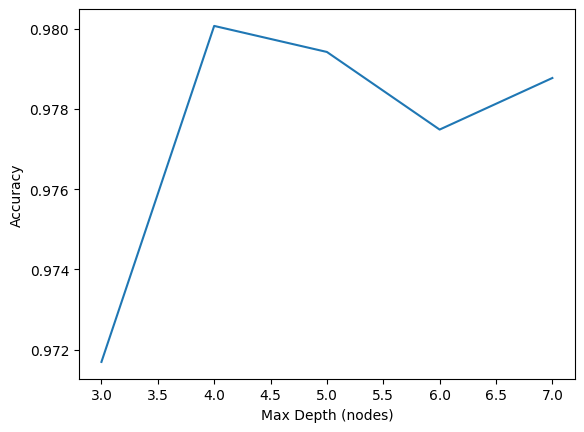

In [ ]:
plt.plot(
    tree_params,
    tree_avg_scores)
plt.xlabel("Max Depth (nodes)")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
tree_top_index = np.argmax(tree_avg_scores)
tree_top_param = tree_params[tree_top_index]
tree_top_score = tree_avg_scores[tree_top_index]
tree_top_error = tree_models.cv_results_["std_test_score"][tree_top_index]

In [ ]:
print("Top tree model is k = {:d} at {:0.2f} +/- {:0.3} accuracy"
    .format(tree_top_param, tree_top_score, tree_top_error))

Top tree model is k = 4 at 0.98 +/- 0.0198 accuracy


**VII. Neural Network Classifier Models**

Создать модель нейронной сети с функциями активации Тана (tanh) и максимальным количеством итераций 5000.

In [ ]:
neural_model = MLPClassifier(
    activation = "tanh",
    solver = "sgd",
    max_iter = 5000)

Определить гиперпараметры (т. е. скрытый_слой_размеры = {3, 4, 5, 6, 7})

In [ ]:
neural_params = [3, 4, 5, 6, 7]
neural_param_grid = {"hidden_layer_sizes" : neural_params }

Создайть 10 моделей для каждого из 5 гиперпараметров, используя 10-кратную перекрестную проверку.

In [ ]:
neural_models = GridSearchCV(
    estimator = neural_model,
    param_grid = neural_param_grid,
    scoring = "accuracy",
    cv = 10,
    verbose = 1)

In [ ]:
neural_models.fit(X = X_train, y = y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=10,
             estimator=MLPClassifier(activation='tanh', max_iter=5000,
                                     solver='sgd'),
             param_grid={'hidden_layer_sizes': [3, 4, 5, 6, 7]},
             scoring='accuracy', verbose=1)

Получить среднюю точность для каждого гиперпараметра

In [ ]:
neural_avg_scores = neural_models.cv_results_["mean_test_score"]

Отобразить среднюю точность для каждого гиперпараметра

In [ ]:
for i in range(0, 5):
    print("{:>3} : {:0.3f}"
        .format(neural_params[i], neural_avg_scores[i]))

  3 : 0.727
  4 : 0.793
  5 : 0.778
  6 : 0.773
  7 : 0.893


Постройть график изменения точности по каждому гиперпараметру

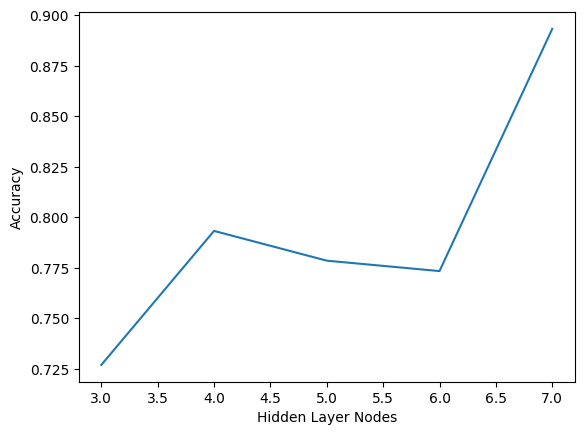

In [ ]:
plt.plot(
    neural_params,
    neural_avg_scores)
plt.xlabel("Hidden Layer Nodes")
plt.ylabel("Accuracy")
plt.show()

Получить гиперпараметр, среднюю точность и стандартную ошибку для наиболее эффективной модели.

In [ ]:
neural_top_index = np.argmax(neural_avg_scores)
neural_top_param = neural_params[neural_top_index]
neural_top_score = neural_avg_scores[neural_top_index]
neural_top_error = neural_models.cv_results_["std_test_score"][neural_top_index]

Изучить статистику 10 самых эффективных моделей.

In [ ]:
print("Top nnet model is k = {:d} at {:0.2f} +/- {:0.3f} accuracy"
    .format(neural_top_param, neural_top_score, neural_top_error))

Top nnet model is k = 7 at 0.89 +/- 0.097 accuracy


**VIII. Оценка моделей**

Сравним тройку лидеров

In [ ]:
print("KNN:  {:0.2f} +/- {:0.3f} accuracy"
    .format(knn_top_score, knn_top_error))
print("Tree: {:0.2f} +/- {:0.3f} accuracy"
    .format(tree_top_score, tree_top_error))
print("NNet: {:0.2f} +/- {:0.3f} accuracy"
    .format(neural_top_score, neural_top_error))

KNN:  0.97 +/- 0.017 accuracy
Tree: 0.98 +/- 0.020 accuracy
NNet: 0.89 +/- 0.097 accuracy


(0.0, 1.0)

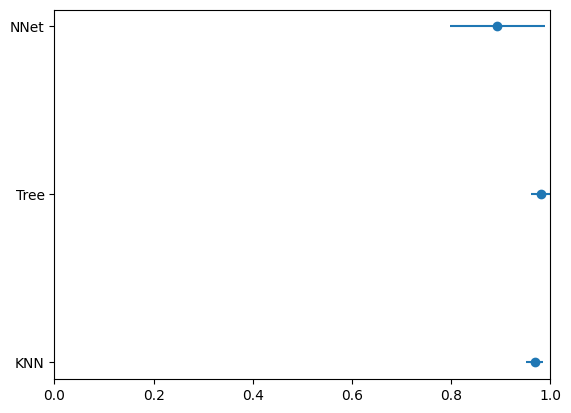

In [ ]:
plt.errorbar(
    x = [knn_top_score, tree_top_score, neural_top_score],
    y = ["KNN", "Tree", "NNet"],
    xerr = [knn_top_error, tree_top_error, neural_top_error],
    linestyle = "none",
    marker = "o")
plt.xlim(0, 1)

**IX. Final Model**

Создать окончательную модель на основе высокопроизводительного алгоритма и гиперпараметра.

In [ ]:
final_model = DecisionTreeClassifier(
    max_depth = 3)

Обучим окончательную модель, используя весь обучающий набор

In [ ]:
final_model.fit(X = X_train, y = y_train)

DecisionTreeClassifier(max_depth=3)

Прогнозируйте метки набора тестов, используя набор тестов для удержания

In [ ]:
final_model.fit(
    X = X_train,
    y = y_train)

DecisionTreeClassifier(max_depth=3)

Получите окончательную точность прогноза

In [ ]:
final_predictions = final_model.predict(X_test)

In [ ]:
final_score = accuracy_score(
    y_true = y_test,
    y_pred = final_predictions)

In [ ]:
print(final_score)

0.9794344473007712


**X. Deploy the Model**

Вопрос, на который предстоит ответить: **Насколько вероятно, что Джек переживет Титаник?**
<br>
1. Создать входной фрейм данных объекта для Джека.

In [ ]:
X_jack = pd.DataFrame(
    columns = ["Gender", "State_Rate", "Height", "Weight", "BMI", "Age"],
    data = [[1, 0.09080315, 183, 75, 22.4, 20]])

Предскажите класс риска Джека.

In [ ]:
final_model.predict(X_jack)[0]

'Low'

Предскажите вероятность того, что Джек принадлежит к указанному выше классу риска.

In [ ]:
final_model.predict_proba(X_jack)[0][1]

np.float64(1.0)